In [1]:
import os
os.chdir('D:/git/forecast_template/forecast/recommend/rec')
import pandas as pd

In [7]:
data = merge_raw_data()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



total data size: (594358, 8)
raw data columns: click_mode, d, o, pid, plan_time, plans, req_time, sid


In [8]:
len(data)

594358

In [9]:
data.head()

,click_mode,d,o,pid,plan_time,plans,req_time,sid
0,9.0,"116.32,39.96","116.29,39.97",NaN,2018-11-02 17:54:30,"[{""distance"": 5219, ""price"": 300, ""eta"": 1367,...",2018-11-02 17:54:30,3000821
1,1.0,"116.33,39.79","116.39,39.84",210736.0,2018-11-16 10:53:10,"[{""distance"": 13864, ""price"": 600, ""eta"": 3221...",2018-11-16 10:53:10,3085857
2,9.0,"116.27,40.00","116.31,39.93",NaN,2018-10-06 10:33:58,"[{""distance"": 12294, ""price"": 400, ""eta"": 2472...",2018-10-06 10:33:58,2944522
3,1.0,"116.39,39.90","116.27,39.88",202427.0,2018-11-23 14:54:11,"[{""distance"": 14853, ""price"": 1700, ""eta"": 291...",2018-11-23 14:54:11,559931
4,7.0,"116.37,39.86","116.34,39.96",172251.0,2018-10-30 11:48:41,"[{""distance"": 12882, ""price"": 600, ""eta"": 3211...",2018-10-30 11:48:41,2819352


In [201]:
od_df=pd.read_csv('../data/data_set_phase1/lnt_lat.csv')
address_df=pd.read_csv('../data/data_set_phase1/lntlat_adress_6525.csv')
weather_df=pd.read_csv('../data/data_set_phase1/weather_20180901-2018-12-31.csv')

In [202]:
od_df['lnt']=od_df['lntlat'].apply(lambda x:eval(x.split(',')[0]))
od_df['lat']=od_df['lntlat'].apply(lambda x:eval(x.split(',')[1]))

In [83]:
weather_df.head()

,aqi,cityid,citynm,cityno,humidity,temp,temperature,uptime,weaid,weather,weather_icon,weather_iconid,weatid,week,wind,windid,winp,winpid
0,43,101010100,北京,beijing,74%,24,24℃,2018-09-01 00:40:00,1,多云,http://api.k780.com/upload/weather/d/1.gif,1,2,星期六,东风,10,1级,201
1,43,101010100,北京,beijing,73%,24,24℃,2018-09-01 00:50:00,1,多云,http://api.k780.com/upload/weather/d/1.gif,1,2,星期六,东风,10,1级,201
2,53,101010100,北京,beijing,76%,23,23℃,2018-09-01 02:35:00,1,多云,http://api.k780.com/upload/weather/d/1.gif,1,2,星期六,东南风,12,2级,203
3,57,101010100,北京,beijing,92%,20,20℃,2018-09-01 04:30:00,1,多云,http://api.k780.com/upload/weather/d/1.gif,1,2,星期六,东南风,12,1级,201
4,75,101010100,北京,beijing,97%,20,20℃,2018-09-01 06:30:00,1,多云,http://api.k780.com/upload/weather/d/1.gif,1,2,星期六,东南风,12,1级,201


Text(0, 0.5, 'Feature 1')

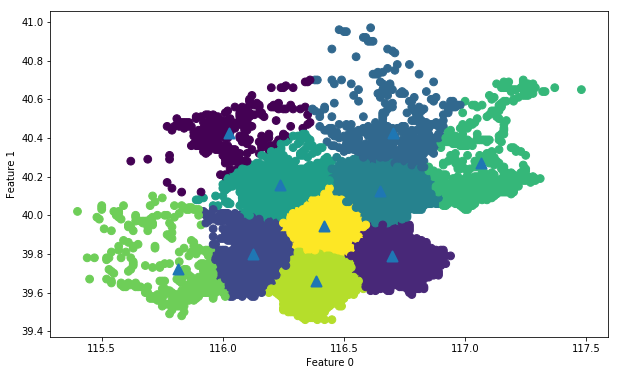

In [91]:
# 生成模拟的two_moons数据（这次的噪声较小）


from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
X = od_df[['lnt','lat']].values
# 将数据聚类成2个
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# 画出簇分配和簇中心
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [55]:
len(y_pred)

6525

In [92]:
od_df['od_class10']=y_pred

In [93]:
od_df.to_csv('../data/features/gbdt/od_class.csv',index=False)

In [76]:
od_df['od_class10']=od_df['od_class']

In [204]:
od_df.head()

,lntlat,lnt,lat
0,"116.29,39.97",116.29,39.97
1,"116.39,39.84",116.39,39.84
2,"116.31,39.93",116.31,39.93
3,"116.27,39.88",116.27,39.88
4,"116.34,39.96",116.34,39.96


In [200]:
len(od_df)

594358

In [94]:
data.head()

,click_mode,d,o,pid,plan_time,plans,req_time,sid
0,9.0,"116.32,39.96","116.29,39.97",NaN,2018-11-02 17:54:30,"[{""distance"": 5219, ""price"": 300, ""eta"": 1367,...",2018-11-02 17:54:30,3000821
1,1.0,"116.33,39.79","116.39,39.84",210736.0,2018-11-16 10:53:10,"[{""distance"": 13864, ""price"": 600, ""eta"": 3221...",2018-11-16 10:53:10,3085857
2,9.0,"116.27,40.00","116.31,39.93",NaN,2018-10-06 10:33:58,"[{""distance"": 12294, ""price"": 400, ""eta"": 2472...",2018-10-06 10:33:58,2944522
3,1.0,"116.39,39.90","116.27,39.88",202427.0,2018-11-23 14:54:11,"[{""distance"": 14853, ""price"": 1700, ""eta"": 291...",2018-11-23 14:54:11,559931
4,7.0,"116.37,39.86","116.34,39.96",172251.0,2018-10-30 11:48:41,"[{""distance"": 12882, ""price"": 600, ""eta"": 3211...",2018-10-30 11:48:41,2819352


In [96]:
merge_df1=pd.merge(data[['sid','o','d']],od_df,left_on=['o'],right_on=['lntlat'])

In [98]:
merge_df1.head()

,sid,o,d,lntlat,lnt,lat,od_class20,od_class10
0,3000821,"116.29,39.97","116.32,39.96","116.29,39.97",116.29,39.97,10,9
1,1459068,"116.29,39.97","116.42,39.84","116.29,39.97",116.29,39.97,10,9
2,1687760,"116.29,39.97","116.27,39.94","116.29,39.97",116.29,39.97,10,9
3,2382217,"116.29,39.97","116.33,40.04","116.29,39.97",116.29,39.97,10,9
4,600797,"116.29,39.97","116.36,39.96","116.29,39.97",116.29,39.97,10,9


In [101]:
merge_df1.columns=['sid', 'o', 'd', 'lntlat', 'lnt', 'lat', 'o20', 'o10']

In [103]:
merge_df1=merge_df1[['sid', 'o', 'd', 'lnt', 'lat', 'o20', 'o10']]

In [104]:
merge_df1.head()

,sid,o,d,lnt,lat,o20,o10
0,3000821,"116.29,39.97","116.32,39.96",116.29,39.97,10,9
1,1459068,"116.29,39.97","116.42,39.84",116.29,39.97,10,9
2,1687760,"116.29,39.97","116.27,39.94",116.29,39.97,10,9
3,2382217,"116.29,39.97","116.33,40.04",116.29,39.97,10,9
4,600797,"116.29,39.97","116.36,39.96",116.29,39.97,10,9


In [108]:
merge_df2=pd.merge(merge_df1,od_df[['lntlat', 'od_class20', 'od_class10']],left_on=['d'],right_on=['lntlat'])

In [111]:
merge_df2.columns=['sid', 'o', 'd', 'lnt', 'lat', 'o20', 'o10', 'lntlat', 'd20',
       'd10']

In [117]:
merge_df2=merge_df2[['sid', 'o', 'd', 'lnt', 'lat',  'o10','o20','d10',  'd20']]

In [118]:
merge_df2.head()

,sid,o,d,lnt,lat,o10,o20,d10,d20
0,3000821,"116.29,39.97","116.32,39.96",116.29,39.97,9,10,9,10
1,1923597,"116.29,39.97","116.32,39.96",116.29,39.97,9,10,9,10
2,3037862,"116.29,39.97","116.32,39.96",116.29,39.97,9,10,9,10
3,1408630,"116.29,39.97","116.32,39.96",116.29,39.97,9,10,9,10
4,393602,"116.39,39.84","116.32,39.96",116.39,39.84,9,1,9,10


In [124]:
merge_df2.to_csv('../data/features/gbdt/features_od.csv',index=False)

In [123]:
sorted(merge_df2['d10'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [125]:
from geopy.distance import geodesic

ModuleNotFoundError: No module named 'geopy'

In [61]:
od_df=pd.read_csv('../data/features/gbdt/features_od.csv')

In [133]:
features_new_df=pd.read_csv('../data/features/features_new.csv')

In [136]:
features_new_df.columns

Index(['sid', 'pid', 'click_mode', 'o1', 'o2', 'd1', 'd2', 'first_mode',
       'max_dist', 'min_dist', 'mean_dist', 'std_dist', 'max_price',
       'min_price', 'mean_price', 'std_price', 'max_eta', 'min_eta',
       'mean_eta', 'std_eta', 'max_dist_mode', 'min_dist_mode',
       'max_price_mode', 'min_price_mode', 'max_eta_mode', 'min_eta_mode',
       'mode_feas_0', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
       'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
       'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
       'svd_mode_0', 'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8', 'svd_mode_9',
       'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3', 'svd_fea_4',
       'svd_fea_5', 'svd_fea_6', 'svd_fea_7', 'svd_fea_8', 'svd_fea_9',
       'svd_fea_10', 'svd_fea_11', 'svd_fea_12', 'svd_fea_13', 'svd_fea_14',
       'svd_fea_15', 'svd_fea_16', 'svd_fea_17', 'svd_fea_18', 'svd_fea_

In [63]:
od_df=od_df[['sid',  'o10', 'o20', 'd10', 'd20', 'num_direct_distance']]

In [64]:
od_df.head()

,sid,o10,o20,d10,d20,num_direct_distance
0,3000821,9,10,9,10,2793.287376
1,1923597,9,10,9,10,2793.287376
2,3037862,9,10,9,10,2793.287376
3,1408630,9,10,9,10,2793.287376
4,393602,9,1,9,10,14606.933281


In [191]:
features_new_od_df=pd.merge(features_new_df,od_df,on=['sid'],how='inner')

In [193]:
features_new_od_df.head()

,sid,pid,click_mode,o1,o2,d1,d2,first_mode,max_dist,min_dist,...,svd_fea_17,svd_fea_18,svd_fea_19,weekday,hour,o10,o20,d10,d20,num_direct_distance
0,3000821,-1.0,9.0,116.29,39.97,116.32,39.96,9,5219,4046,...,-0.000000,-0.000000,-0.000000,4,17,9,10,9,10,2793.287376
1,3085857,210736.0,1.0,116.39,39.84,116.33,39.79,7,13864,11106,...,0.879959,0.022791,-0.246445,4,10,9,1,8,1,7563.924113
2,2944522,-1.0,9.0,116.31,39.93,116.27,40.00,9,13018,9023,...,-0.000000,-0.000000,-0.000000,5,10,9,10,5,10,8490.531926
3,559931,202427.0,1.0,116.27,39.88,116.39,39.90,10,15124,13640,...,-0.082645,-0.121038,-0.334641,4,14,9,1,9,10,10501.168219
4,2819352,172251.0,7.0,116.34,39.96,116.37,39.86,7,13203,1,...,0.831827,0.082881,-0.049859,1,11,9,10,9,10,11395.752658


In [145]:
features_new_od_df.columns

Index(['sid', 'pid', 'click_mode', 'o1', 'o2', 'd1', 'd2', 'first_mode',
       'max_dist', 'min_dist', 'mean_dist', 'std_dist', 'max_price',
       'min_price', 'mean_price', 'std_price', 'max_eta', 'min_eta',
       'mean_eta', 'std_eta', 'max_dist_mode', 'min_dist_mode',
       'max_price_mode', 'min_price_mode', 'max_eta_mode', 'min_eta_mode',
       'mode_feas_0', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
       'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
       'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
       'svd_mode_0', 'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8', 'svd_mode_9',
       'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3', 'svd_fea_4',
       'svd_fea_5', 'svd_fea_6', 'svd_fea_7', 'svd_fea_8', 'svd_fea_9',
       'svd_fea_10', 'svd_fea_11', 'svd_fea_12', 'svd_fea_13', 'svd_fea_14',
       'svd_fea_15', 'svd_fea_16', 'svd_fea_17', 'svd_fea_18', 'svd_fea_

In [148]:
round(features_new_df,7).to_csv('../data/features/features_new.csv',index=False)
round(features_new_od_df,7).to_csv('../data/features/features_new_od.csv',index=False)

In [147]:
features_new_od_df['same_cls']=

Index(['sid', 'pid', 'click_mode', 'o1', 'o2', 'd1', 'd2', 'first_mode',
       'max_dist', 'min_dist', 'mean_dist', 'std_dist', 'max_price',
       'min_price', 'mean_price', 'std_price', 'max_eta', 'min_eta',
       'mean_eta', 'std_eta', 'max_dist_mode', 'min_dist_mode',
       'max_price_mode', 'min_price_mode', 'max_eta_mode', 'min_eta_mode',
       'mode_feas_0', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
       'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
       'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
       'svd_mode_0', 'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8', 'svd_mode_9',
       'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3', 'svd_fea_4',
       'svd_fea_5', 'svd_fea_6', 'svd_fea_7', 'svd_fea_8', 'svd_fea_9',
       'svd_fea_10', 'svd_fea_11', 'svd_fea_12', 'svd_fea_13', 'svd_fea_14',
       'svd_fea_15', 'svd_fea_16', 'svd_fea_17', 'svd_fea_18', 'svd_fea_

In [149]:
data.head()

,click_mode,d,o,pid,plan_time,plans,req_time,sid
0,9.0,"116.32,39.96","116.29,39.97",NaN,2018-11-02 17:54:30,"[{""distance"": 5219, ""price"": 300, ""eta"": 1367,...",2018-11-02 17:54:30,3000821
1,1.0,"116.33,39.79","116.39,39.84",210736.0,2018-11-16 10:53:10,"[{""distance"": 13864, ""price"": 600, ""eta"": 3221...",2018-11-16 10:53:10,3085857
2,9.0,"116.27,40.00","116.31,39.93",NaN,2018-10-06 10:33:58,"[{""distance"": 12294, ""price"": 400, ""eta"": 2472...",2018-10-06 10:33:58,2944522
3,1.0,"116.39,39.90","116.27,39.88",202427.0,2018-11-23 14:54:11,"[{""distance"": 14853, ""price"": 1700, ""eta"": 291...",2018-11-23 14:54:11,559931
4,7.0,"116.37,39.86","116.34,39.96",172251.0,2018-10-30 11:48:41,"[{""distance"": 12882, ""price"": 600, ""eta"": 3211...",2018-10-30 11:48:41,2819352


In [222]:
pred=pd.read_csv('../submit/lgb_result_2019-05-12-14-21-05.csv')

In [228]:
d=dict(pred.recommend_mode.value_counts())

In [231]:
s=[(i,d[i]) for i in sorted(d.keys())]

In [233]:
x1,y1=list(zip(*s))

In [235]:
y1


(2079, 18073, 34092, 507, 46, 10919, 340, 22401, 232, 1827, 3424, 418)

<BarContainer object of 12 artists>

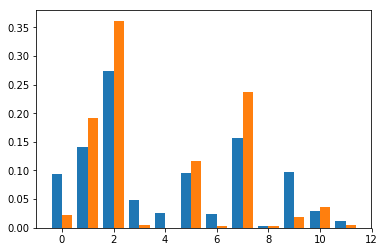

In [253]:
nx,ny=np.array(x[1:]),np.array(y[1:])/sum(y[1:])
nx1,ny1=np.array(x1),np.array(y1)/sum(y1)

width =0.4
plt.bar(nx- width/2,ny,width=0.4)
plt.bar(nx1+ width/2,ny1,width=0.4)

In [252]:
ny1

array([0.02203311, 0.19153649, 0.36130482, 0.00537315, 0.00048751,
       0.11571886, 0.0036033 , 0.23740435, 0.00245872, 0.01936243,
       0.03628733, 0.00442994])

In [171]:
z1=sorted(z,key=lambda x:x[0])

In [243]:
y

(94358,
 46664,
 70369,
 136491,
 24626,
 12606,
 47480,
 11863,
 78209,
 1857,
 48864,
 14882,
 6089)

In [175]:
x,y=list(zip(*z1))

In [169]:
[ for t in d.items()]

{2.0: 136491,
 -1.0: 94358,
 7.0: 78209,
 1.0: 70369,
 9.0: 48864,
 5.0: 47480,
 0.0: 46664,
 3.0: 24626,
 10.0: 14882,
 4.0: 12606,
 6.0: 11863,
 11.0: 6089,
 8.0: 1857}

<BarContainer object of 13 artists>

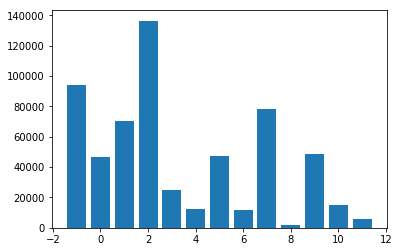

In [176]:
plt.bar(x,y)

In [178]:
list(zip(x,y))

[(-1.0, 94358),
 (0.0, 46664),
 (1.0, 70369),
 (2.0, 136491),
 (3.0, 24626),
 (4.0, 12606),
 (5.0, 47480),
 (6.0, 11863),
 (7.0, 78209),
 (8.0, 1857),
 (9.0, 48864),
 (10.0, 14882),
 (11.0, 6089)]

In [179]:
features_new_od_df=pd.read_csv('../data/features/features_new_od.csv')

In [183]:
features_new_od_df.head()

,sid,pid,click_mode,o1,o2,d1,d2,first_mode,max_dist,min_dist,...,svd_fea_17,svd_fea_18,svd_fea_19,weekday,hour,o10,o20,d10,d20,num_direct_distance
0,3000821,-1.0,9.0,116.29,39.97,116.32,39.96,9,5219,4046,...,0.000000,0.000000,0.000000,4,17,9,10,9,10,2793.287376
1,3085857,210736.0,1.0,116.39,39.84,116.33,39.79,7,13864,11106,...,0.879959,0.022791,-0.246445,4,10,9,1,8,1,7563.924113
2,2944522,-1.0,9.0,116.31,39.93,116.27,40.00,9,13018,9023,...,0.000000,0.000000,0.000000,5,10,9,10,5,10,8490.531926
3,559931,202427.0,1.0,116.27,39.88,116.39,39.90,10,15124,13640,...,-0.082645,-0.121038,-0.334641,4,14,9,1,9,10,10501.168219
4,2819352,172251.0,7.0,116.34,39.96,116.37,39.86,7,13203,1,...,0.831827,0.082881,-0.049859,1,11,9,10,9,10,11395.752658


In [194]:
features_new_od_df['same_cls10']=0
features_new_od_df.loc[features_new_od_df['o10']==features_new_od_df['d10'],'same_cls10']=1
features_new_od_df['same_cls20']=0

features_new_od_df.loc[features_new_od_df['o20']==features_new_od_df['d20'],'same_cls10']=1

In [185]:
len(features_new_od_df[features_new_od_df['o10']==features_new_od_df['d10']])

401931

In [186]:
len(features_new_od_df[features_new_od_df['o20']==features_new_od_df['d20']])

355679

In [195]:
round(features_new_od_df,7).to_csv('../data/features/features_new_od.csv',index=False)

In [196]:
features_new_od_df.head()

,sid,pid,click_mode,o1,o2,d1,d2,first_mode,max_dist,min_dist,...,svd_fea_19,weekday,hour,o10,o20,d10,d20,num_direct_distance,same_cls10,same_cls20
0,3000821,-1.0,9.0,116.29,39.97,116.32,39.96,9,5219,4046,...,-0.000000,4,17,9,10,9,10,2793.287376,1,0
1,3085857,210736.0,1.0,116.39,39.84,116.33,39.79,7,13864,11106,...,-0.246445,4,10,9,1,8,1,7563.924113,1,0
2,2944522,-1.0,9.0,116.31,39.93,116.27,40.00,9,13018,9023,...,-0.000000,5,10,9,10,5,10,8490.531926,1,0
3,559931,202427.0,1.0,116.27,39.88,116.39,39.90,10,15124,13640,...,-0.334641,4,14,9,1,9,10,10501.168219,1,0
4,2819352,172251.0,7.0,116.34,39.96,116.37,39.86,7,13203,1,...,-0.049859,1,11,9,10,9,10,11395.752658,1,0


In [198]:
features_new_od_df.columns

Index(['sid', 'pid', 'click_mode', 'o1', 'o2', 'd1', 'd2', 'first_mode',
       'max_dist', 'min_dist', 'mean_dist', 'std_dist', 'max_price',
       'min_price', 'mean_price', 'std_price', 'max_eta', 'min_eta',
       'mean_eta', 'std_eta', 'max_dist_mode', 'min_dist_mode',
       'max_price_mode', 'min_price_mode', 'max_eta_mode', 'min_eta_mode',
       'mode_feas_0', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
       'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
       'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
       'svd_mode_0', 'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8', 'svd_mode_9',
       'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3', 'svd_fea_4',
       'svd_fea_5', 'svd_fea_6', 'svd_fea_7', 'svd_fea_8', 'svd_fea_9',
       'svd_fea_10', 'svd_fea_11', 'svd_fea_12', 'svd_fea_13', 'svd_fea_14',
       'svd_fea_15', 'svd_fea_16', 'svd_fea_17', 'svd_fea_18', 'svd_fea_

In [207]:
plan_df =pd.read_csv('../data/data_set_phase1/plans_new.csv')

In [213]:
plan_df =plan_df[['sid', 'distance', 'eta', 'price', 'transport_mode']]

In [212]:
plan_df.columns

Index(['sid', 'plan_time', 'distance', 'eta', 'price', 'transport_mode'], dtype='object')

In [214]:
plan_df.head()

,sid,distance,eta,price,transport_mode
0,3000821,5219,1367,300.0,9
1,3000821,4537,1035,0.0,3
2,3000821,4537,1095,2100.0,4
3,3000821,4118,1243,0.0,6
4,3000821,5219,1679,300.0,2


In [215]:
features_new_od_df.head()

,sid,pid,click_mode,o1,o2,d1,d2,first_mode,max_dist,min_dist,...,svd_fea_19,weekday,hour,o10,o20,d10,d20,num_direct_distance,same_cls10,same_cls20
0,3000821,-1.0,9.0,116.29,39.97,116.32,39.96,9,5219,4046,...,-0.000000,4,17,9,10,9,10,2793.287376,1,0
1,3085857,210736.0,1.0,116.39,39.84,116.33,39.79,7,13864,11106,...,-0.246445,4,10,9,1,8,1,7563.924113,1,0
2,2944522,-1.0,9.0,116.31,39.93,116.27,40.00,9,13018,9023,...,-0.000000,5,10,9,10,5,10,8490.531926,1,0
3,559931,202427.0,1.0,116.27,39.88,116.39,39.90,10,15124,13640,...,-0.334641,4,14,9,1,9,10,10501.168219,1,0
4,2819352,172251.0,7.0,116.34,39.96,116.37,39.86,7,13203,1,...,-0.049859,1,11,9,10,9,10,11395.752658,1,0


In [217]:
features_od_expanded =pd.merge(features_new_od_df,plan_df,on=['sid'],how='inner')

2706625

In [218]:
len(features_od_expanded)

2706625

In [9]:
os.path.abspath(os.curdir)

'D:\\git\\forecast_template\\forecast\\recommend\\rec'

In [220]:
round(features_od_expanded,7).to_csv('../data/features/features_new_od_expanded.csv',index=False)

In [10]:
df=pd.read_csv('../submit/lgb_result_2019-05-13-12-59-58.csv')

In [83]:
df1=pd.read_csv('../submit/lgb_result_2019-05-14-14-21-01.csv')

In [86]:
df1['recommend_mode']=df1['recommend_mode'].astype(np.int32)

In [88]:
df1.to_csv('../submit/lgb_result_2019-05-14-14-21-01.csv',index=False)

In [23]:
df.columns

Index(['sid', 'recommend_mode'], dtype='object')

In [28]:
df.loc[df['sid'].isin(a),'recommend_mode']=0

In [51]:
df_14=pd.read_csv('../submit/lgb_result_2019-05-14-11-31-55.csv')

In [27]:
len(df1.sid.unique())

94358

In [30]:
def merge_raw_data():
    """
    1.tr_queries 中没有tr_plans 的8946
    2.tr_plans 中没有 tr_click 的占37718；tr_click是tr_plans的子集
    3.te_queries中没有te_plans的占1787
    结论:
    1.有tr_plans 的没有tr_click 37718的需要把click_mode=0 作为训练数据
    2.没有tr_plans的 8946 不需要作为训练数据
    3.没有te_plans的tr_queries 1787 直接预测为0

    d1=feature_df[(feature_df['click_mode'] ==0)&(feature_df['max_dist'] !=-1)]
    d2=feature_df[(feature_df['click_mode'] ==0)&(feature_df['max_dist'] ==-1)]
    d3=feature_df[(feature_df['click_mode'] ==-1)&(feature_df['max_dist'] ==-1)]
    # 同一个sid，有相同的transoport 推荐 110208
    110208
    395
    290
    1
    tr_plans[tr_plans['sid']==3190603].iloc[0].plans

    没有plans的query 直接预测为0(没点击)
    :return:
    """
    # 500000 sid 唯一 ;163979 pid为null;8946 个sid没有 tr_plans;46664 没有tr_click
    # 有plans 没有 click 37718
    # sid pid req_time o d
    tr_queries = pd.read_csv('../data/data_set_phase1/train_queries.csv')
    # 94358 sid 唯一;30878 pid 为null ;1787个sid没有te_plans
    te_queries = pd.read_csv('../data/data_set_phase1/test_queries.csv')
    # 491054 sid 唯一; 无缺失值
    # sid plan_time plans([1, 2, 3, 4, 5, 6, 7]) 有1-7个plan
    # plan 格式{distance eta price transport_mode:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
    tr_plans = pd.read_csv('../data/data_set_phase1/train_plans.csv')
    # 92571 sid 唯一; 无缺失值
    te_plans = pd.read_csv('../data/data_set_phase1/test_plans.csv')
    # 453336 sid 唯一; 无缺失值
    # sid click_time click_mode：[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    tr_click = pd.read_csv('../data/data_set_phase1/train_clicks.csv')
    # 训练数据
    tr_data = tr_queries.merge(tr_click, on='sid', how='left')
    tr_data = tr_data.merge(tr_plans, on='sid', how='left')
    # click_time无用
    tr_data = tr_data.drop(['click_time'], axis=1)
    # 左连接不上的label置0
    tr_data['click_mode'] = tr_data['click_mode'].fillna(0)
    # 测试数据
    te_data = te_queries.merge(te_plans, on='sid', how='left')
    # label置-1
    te_data['click_mode'] = -1

    data = pd.concat([tr_data, te_data], axis=0)
    # data = data.drop(['plan_time'], axis=1)
    data = data.reset_index(drop=True)
    print('total data size: {}'.format(data.shape))
    print('raw data columns: {}'.format(', '.join(data.columns)))
    return data


In [31]:
te_queries = pd.read_csv('../data/data_set_phase1/test_queries.csv')

In [34]:
s1=te_queries.sid
s2=df.sid

In [35]:
s=set(s1)-set(s2)

In [36]:
len(s)

1787

In [38]:
df3=pd.DataFrame()

In [40]:
df3['sid']=list(s)

In [42]:
df3['recommend_mode']=0

In [43]:
df_final=pd.concat([df,df3],axis=0)

In [44]:
len(df_final)

94358

In [45]:
len(df1)

94358

In [46]:
df_final.to_csv('../submit/2019-05-13-merge.csv',index=False)

In [49]:
len(df1[df1['click_mode']==0])

2129

In [50]:
df1.head()

,sid,click_mode
0,1408630,2
1,1348867,1
2,2045845,1
3,1265725,1
4,1360439,2


In [93]:
df_14['recommend_mode'].value_counts()

2.0     33497
7.0     20939
1.0     14123
0.0     13308
5.0     10263
10.0     1367
9.0       621
3.0        98
11.0       96
6.0        26
8.0        11
4.0         9
Name: recommend_mode, dtype: int64

In [54]:
df['recommend_mode'].value_counts()

2     33857
7     22354
1     18569
5     10899
10     3462
9      1748
11      417
3       381
0       342
6       292
8       214
4        36
Name: recommend_mode, dtype: int64

In [87]:
df1['recommend_mode'].value_counts()

2     33494
7     21024
1     14245
0     13187
5     10268
10     1332
9       594
3        98
11       67
6        29
8        10
4        10
Name: recommend_mode, dtype: int64

In [56]:
df_final1=pd.concat([df_14,df3],axis=0)

In [57]:
len(df_final1)

94358

In [58]:
df_final1.to_csv('../submit/2019-05-14-merge.csv',index=False)

In [59]:
od_df.head()

NameError: name 'od_df' is not defined

In [65]:
expanded_feature_df = pd.read_csv('../data/features/expanded_features_contain_zero.csv')

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
expanded_feature_df['click_mode'].value_counts()

 2.0     620336
-1.0     431590
 7.0     348352
 1.0     340278
 9.0     261513
 0.0     184708
 5.0     178248
 3.0     112816
 10.0     77349
 6.0      61174
 4.0      60990
 11.0     30546
 8.0       9458
Name: click_mode, dtype: int64

In [67]:
expanded_feature_df.columns

Index(['sid', 'plan_time', 'plan_pos', 'distance', 'eta', 'price',
       'transport_mode', 'dj', 'sd', 'sd_dj', 'pid', 'click_mode', 'o1', 'o2',
       'd1', 'd2', 'first_mode', 'max_dist', 'min_dist', 'mean_dist',
       'std_dist', 'max_price', 'min_price', 'mean_price', 'std_price',
       'max_eta', 'min_eta', 'mean_eta', 'std_eta', 'max_dist_mode',
       'min_dist_mode', 'max_price_mode', 'min_price_mode', 'max_eta_mode',
       'min_eta_mode', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
       'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
       'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
       'svd_mode_0', 'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8', 'svd_mode_9',
       'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3', 'svd_fea_4',
       'svd_fea_5', 'svd_fea_6', 'svd_fea_7', 'svd_fea_8', 'svd_fea_9',
       'svd_fea_10', 'svd_fea_11', 'svd_fea_12', 'svd_fea_13', 's

In [72]:
merge_od_df=pd.merge(expanded_feature_df,od_df,on=['sid'],how='inner')

In [68]:
len(od_df)

594358

In [71]:
len(expanded_feature_df)

2717358

In [73]:
len(merge_od_df)

2717358

In [81]:
merge_od_df.to_csv('../data/features/expanded_features_contain_zero_od.csv',index=False)

In [82]:
merge_od_df.columns

Index(['sid', 'plan_time', 'plan_pos', 'distance', 'eta', 'price',
       'transport_mode', 'dj', 'sd', 'sd_dj', 'pid', 'click_mode', 'o1', 'o2',
       'd1', 'd2', 'first_mode', 'max_dist', 'min_dist', 'mean_dist',
       'std_dist', 'max_price', 'min_price', 'mean_price', 'std_price',
       'max_eta', 'min_eta', 'mean_eta', 'std_eta', 'max_dist_mode',
       'min_dist_mode', 'max_price_mode', 'min_price_mode', 'max_eta_mode',
       'min_eta_mode', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
       'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
       'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
       'svd_mode_0', 'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8', 'svd_mode_9',
       'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3', 'svd_fea_4',
       'svd_fea_5', 'svd_fea_6', 'svd_fea_7', 'svd_fea_8', 'svd_fea_9',
       'svd_fea_10', 'svd_fea_11', 'svd_fea_12', 'svd_fea_13', 's

In [75]:
len(merge_od_df.columns)

84

In [77]:
od_df.head()

,sid,o10,o20,d10,d20,num_direct_distance
0,3000821,9,10,9,10,2793.287376
1,1923597,9,10,9,10,2793.287376
2,3037862,9,10,9,10,2793.287376
3,1408630,9,10,9,10,2793.287376
4,393602,9,1,9,10,14606.933281


In [78]:
merge_od_df['same_cls20']=0
merge_od_df.loc[merge_od_df['o20']==merge_od_df['d20'],'same_cls20']=1
merge_od_df['same_cls10']=0
merge_od_df.loc[merge_od_df['o10']==merge_od_df['d10'],'same_cls10']=1

In [80]:
merge_od_df['same_cls20'].value_counts()

1    1671092
0    1046266
Name: same_cls20, dtype: int64

In [89]:
df3.head()

,sid,recommend_mode
0,1130498,0
1,1441796,0
2,1245191,0
3,1245199,0
4,2048018,0


In [94]:
df_14=pd.read_csv('../submit/lgb_result_2019-05-14-15-05-35.csv')

df_14[df_14['sid'].isin(df3.sid)].recommend_mode.value_counts()

0.0    1787
Name: recommend_mode, dtype: int64

In [91]:
df_14.head()

,sid,recommend_mode
0,1126541,2.0
1,453685,1.0
2,2066073,7.0
3,452746,0.0
4,1431672,5.0


In [95]:
df_14.recommend_mode.value_counts()

2.0     33961
7.0     22463
1.0     18375
5.0     10952
10.0     3412
9.0      1804
0.0      1787
3.0       522
11.0      435
6.0       347
8.0       192
4.0       108
Name: recommend_mode, dtype: int64

In [96]:
df_14['recommend_mode']=df_14['recommend_mode'].astype(np.int32)

In [97]:
df_14.to_csv('../submit/lgbext_valid_result.csv',index=False)

In [99]:
df15=pd.read_csv('../models/BKP/model_0')

In [102]:
df15.recommend_mode.value_counts()


2     28789
7     18391
0     16395
1     14394
5      8688
10     2385
9      2344
3      1314
6       668
4       498
11      321
8       171
Name: recommend_mode, dtype: int64

In [103]:
df15[df15['sid'].isin(df3.sid)].recommend_mode.value_counts()

0    1787
Name: recommend_mode, dtype: int64

In [104]:
2     33857
7     22354
1     18569
5     10899
10     3462
9      1748
11      417
3       381
0       342
6       292
8       214
4        36

,sid,recommend_mode
0,1126541,0
1,453685,5
2,2066073,7
3,452746,0
4,1431672,3


In [105]:
from time import gmtime, strftime

import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import matplotlib.pylab as plt

base_features = [
    # 'sid',  'd', 'o', 'pid','plan_time', 'click_mode',
    #  'is_rain' 'is_rain_max_mode',
    'o1', 'o2', 'd1', 'd2',
    # 'o10', 'd10', 'same_cls10',
    'o20', 'd20', 'same_cls20',
    # 'o30', 'd30', 'same_cls30',
    'num_direct_distance',
    # 'o10_max_mode', 'd10_max_mode',
    'o20_max_mode', 'd20_max_mode',
    # 'o30_max_mode', 'd30_max_mode',

    # tfidf svd
    'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3', 'svd_fea_4', 'svd_fea_5',
    'svd_fea_6', 'svd_fea_7', 'svd_fea_8', 'svd_fea_9', 'svd_fea_10', 'svd_fea_11',
    # profile svd
    'svd_fea_12', 'svd_fea_13', 'svd_fea_14', 'svd_fea_15',
    'svd_fea_16', 'svd_fea_17', 'svd_fea_18', 'svd_fea_19',
    'weekday', 'hour']

# 没有 'pid'
pid_ext_features = [
    'pid_max_mode',  # cat
    'pid_max_dist', 'pid_min_dist', 'pid_mean_dist', 'pid_std_dist',
    'pid_max_price', 'pid_min_price', 'pid_mean_price', 'pid_std_price',
    'pid_max_eta', 'pid_min_eta', 'pid_mean_eta', 'pid_std_eta',
    'pid_max_dj', 'pid_min_dj', 'pid_mean_dj', 'pid_std_dj',
    'pid_max_sd', 'pid_min_sd', 'pid_mean_sd', 'pid_std_sd',
    'pid_max_sd_dj', 'pid_min_sd_dj', 'pid_mean_sd_dj', 'pid_std_sd_dj',
    # 各个模式占比
    'mode_num_0', 'mode_num_1', 'mode_num_2', 'mode_num_3', 'mode_num_4',
    'mode_num_5', 'mode_num_6', 'mode_num_7', 'mode_num_8', 'mode_num_9',
    'mode_num_10', 'mode_num_11']

# 'mode_texts',
plans_features = ['mode_feas_0', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
                  'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
                  'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
                  'first_mode',
                  'max_dist', 'min_dist', 'mean_dist', 'std_dist',
                  'max_price', 'min_price', 'mean_price', 'std_price',
                  'max_eta', 'min_eta', 'mean_eta', 'std_eta',
                  'max_dj', 'min_dj', 'mean_dj', 'std_dj',
                  'max_sd', 'min_sd', 'mean_sd', 'std_sd',
                  'max_sd_dj', 'min_sd_dj', 'mean_sd_dj', 'std_sd_dj',
                  'max_dist_mode', 'min_dist_mode', 'max_price_mode',
                  'min_price_mode', 'max_eta_mode', 'min_eta_mode',
                  'svd_mode_0', 'svd_mode_1', 'svd_mode_2', 'svd_mode_3',
                  'svd_mode_4', 'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8',
                  'svd_mode_9']

i=0
feature_columns = base_features + pid_ext_features + plans_features
lgb_model=lgb.Booster(model_file='../models/BKP/model_0'.format(i))

imp = pd.DataFrame()
imp['fea'] = feature_columns
imp['imp'] = lgb_model.feature_importances_ 
imp = imp.sort_values('imp',ascending = False)
imp

ModuleNotFoundError: No module named 'lightgbm'

In [73]:
import os
#os.chdir('D:/git/forecast_template/forecast/recommend/rec')
import pandas as pd
df=pd.read_csv('../submit/gbdt_ext_result_2019-05-16-16-23-12.csv')
df=df[['sid','recommend_mode']]
empty_pred=pd.read_csv('../submit/empty_pred.csv')
submit=pd.concat([df,empty_pred],axis=0)

In [79]:
submit.recommend_mode.value_counts()

2     30513
7     19165
1     15987
0     11544
5      9857
10     2604
9      2084
3      1265
11      391
6       369
4       369
8       210
Name: recommend_mode, dtype: int64

In [78]:
c4=submit.recommend_mode.value_counts()

In [58]:
import matplotlib.pylab as plt


In [81]:
submit.recommend_mode.value_counts()

2     30534
7     19196
1     16059
0     11529
5      9860
10     2621
9      2083
3      1201
11      382
6       355
4       349
8       189
Name: recommend_mode, dtype: int64

In [6]:
2     33857
7     22354
1     18569
5     10899
10     3462
9      1748
11      417
3       381
0       342
6       292
8       214
4        36

92571

In [71]:
submit.to_csv('../submit/2019_05_16_gbdt_v3.csv',index=False)

In [174]:
submit=pd.read_csv('../submit/2019-05-17-pre_feat.csv')

In [16]:
import lightgbm as lgb
i=0
lgb_model = lgb.Booster(model_file='../models/model_{}'.format(i))

ModuleNotFoundError: No module named 'lightgbm'

In [39]:
len(data.loc[(data['pid']==-1)&(data['click_mode']!=-1)])

160469

In [173]:
len(submit)

92571

In [170]:
c1=tr_data.click_mode.value_counts()

In [175]:
c2=submit.recommend_mode.value_counts()

In [56]:
def sort_count(c):
    d = dict(c)
    ds = [(k, d[k]) for k in sorted(d.keys())]
    x, y = zip(*ds)
    return x, y

<BarContainer object of 12 artists>

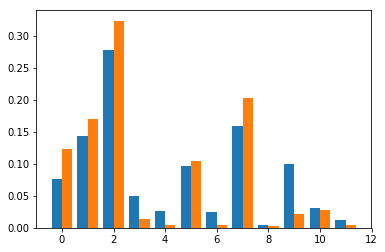

In [176]:
x,y=sort_count(c1)
x1,y1=sort_count(c4)
nx,ny=np.array(x),np.array(y)/sum(y)
nx1,ny1=np.array(x1),np.array(y1)/sum(y1)

width =0.4
plt.bar(nx- width/2,ny,width=0.4)
plt.bar(nx1+ width/2,ny1,width=0.4)

In [28]:
import matplotlib.pylab as plt

In [30]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [35]:
nx,ny

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 array([0.00000000e+00, 2.03643591e-06, 4.07287182e-06, 6.10930773e-06,
        8.14574365e-06, 1.01821796e-05, 1.22186155e-05, 1.42550514e-05,
        1.62914873e-05, 1.83279232e-05, 2.03643591e-05, 2.24007950e-05]))

In [33]:
y1

(4735, 16718, 32607, 1699, 651, 10239, 734, 21010, 281, 2480, 2700, 504)

In [ ]:

Out[45]:
2     32607
7     21010
1     16718
5     10239
0      4735
10     2700
9      2480
3      1699
6       734
4       651
11      504
8       281

In [47]:
c2

2     32607
7     21010
1     16718
5     10239
0      4735
10     2700
9      2480
3      1699
6       734
4       651
11      504
8       281
Name: recommend_mode, dtype: int64

In [2]:
from gen_features_sqw_new import *

In [3]:
data = merge_raw_data()
weather_df = pd.read_csv('../data/data_set_phase1/weather_date.csv', parse_dates=['dt'])
data['plan_time'] = pd.to_datetime(data['plan_time'])
data.loc[data['plan_time'].notnull(), 'dt_str'] = data.loc[data['plan_time'].notnull(), 'plan_time'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
weather_df['dt_str'] = weather_df['dt'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
weather_df['is_rain'] = 0
weather_df.loc[weather_df['weather'] == '阵雨', 'is_rain'] = 1
weather_df.to_csv('../data/data_set_phase1/weather_date_expanded.csv')
merge_df = pd.merge(data, weather_df[['dt_str', 'is_rain']], on=['dt_str'], how='left')
merge_df = merge_df.drop(['dt_str'], axis=1)
merge_df.loc[merge_df['is_rain'].isnull(), 'is_rain'] = 0



D:\git\forecast_template\forecast\recommend\rec\gen_features_sqw_new.py:87: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  data = pd.concat([tr_data, te_data], axis=0)


total data size: (583625, 8)
raw data columns: click_mode, d, o, pid, plan_time, plans, req_time, sid


In [23]:
# 会有Nan值 需要排除-1,否则无法对测试集构造此特征
merge_df['is_rain_max_mode'] = merge_df.groupby(['pid', 'is_rain'])['click_mode'].transform(lambda x: mode_max(x.value_counts()))

In [11]:
mode_max(c1)

2

In [22]:
def mode_max(c):
    # return c[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].idxmax()
    return c.idxmax()

In [14]:
type(c1[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

pandas.core.series.Series

In [19]:
def mode_max(c):
    s=pd.Series(c)
    return s.idxmax()

In [21]:
c1.idxmax()

2.0

In [24]:
profile_data = pd.read_csv('../data/data_set_phase1/profiles.csv')

In [25]:
len(profile_data.pid.unique())

63090

In [32]:


s1=set(data.loc[data['click_mode']!=-1,'pid'])
s2=set(data.loc[data['click_mode']==-1,'pid'])

In [42]:
s=s2-s1

In [51]:
len(s)

3872

In [35]:
features_all_df = pd.read_csv('../data/features/features_all_new_140.csv')

In [36]:
pid_ext_features = [
    'pid_max_mode',  # cat
    'pid_max_dist', 'pid_min_dist', 'pid_mean_dist', 'pid_std_dist',
    'pid_max_price', 'pid_min_price', 'pid_mean_price', 'pid_std_price',
    'pid_max_eta', 'pid_min_eta', 'pid_mean_eta', 'pid_std_eta',
    'pid_max_dj', 'pid_min_dj', 'pid_mean_dj', 'pid_std_dj',
    'pid_max_sd', 'pid_min_sd', 'pid_mean_sd', 'pid_std_sd',
    'pid_max_sd_dj', 'pid_min_sd_dj', 'pid_mean_sd_dj', 'pid_std_sd_dj',
    # # 各个模式占比
    'mode_num_0', 'mode_num_1', 'mode_num_2', 'mode_num_3', 'mode_num_4',
    'mode_num_5', 'mode_num_6', 'mode_num_7', 'mode_num_8', 'mode_num_9',
    'mode_num_10', 'mode_num_11']

In [47]:
features_all_df.loc[features_all_df['pid']==-1,pid_ext_features]

SyntaxError: invalid syntax (<ipython-input-47-fbd8a6e303e7>, line 1)

In [49]:
features_all_df.loc[features_all_df['pid'].isin(s),pid_ext_features]=-1

In [44]:
len(s)

3872

In [83]:
features_all_df=pd.read_csv('../data/features/features_all_new_140_unknow_pid.csv')
extra_df =pd.read_csv('../data/data_set_phase1/pid_ext_features.csv')

In [84]:
pid_ext_features = [
    'pid_max_mode',  # cat
    'pid_max_dist', 'pid_min_dist', 'pid_mean_dist', 'pid_std_dist',
    'pid_max_price', 'pid_min_price', 'pid_mean_price', 'pid_std_price',
    'pid_max_eta', 'pid_min_eta', 'pid_mean_eta', 'pid_std_eta',
    'pid_max_dj', 'pid_min_dj', 'pid_mean_dj', 'pid_std_dj',
    'pid_max_sd', 'pid_min_sd', 'pid_mean_sd', 'pid_std_sd',
    'pid_max_sd_dj', 'pid_min_sd_dj', 'pid_mean_sd_dj', 'pid_std_sd_dj',
    # # 各个模式占比
    'mode_num_0', 'mode_num_1', 'mode_num_2', 'mode_num_3', 'mode_num_4',
    'mode_num_5', 'mode_num_6', 'mode_num_7', 'mode_num_8', 'mode_num_9',
    'mode_num_10', 'mode_num_11']


In [89]:
features_all_df=features_all_df.drop(pid_ext_features,axis=1)

In [135]:
features_all_df=pd.merge(features_all_df,profile_data[['pid','p_cls']],on=['pid'],how='left')

In [96]:
len(features_all_df.columns)

140

In [167]:
round(features_all_df, 7).to_csv('../data/features/features_all_first_mode.csv', index=False)

In [99]:
data.head()

,click_mode,d,o,pid,plan_time,plans,req_time,sid
0,9.0,"116.32,39.96","116.29,39.97",-1.0,2018-11-02 17:54:30,"[{""distance"": 5219, ""price"": 300, ""eta"": 1367,...",2018-11-02 17:54:30,3000821
1,1.0,"116.33,39.79","116.39,39.84",210736.0,2018-11-16 10:53:10,"[{""distance"": 13864, ""price"": 600, ""eta"": 3221...",2018-11-16 10:53:10,3085857
2,9.0,"116.27,40.00","116.31,39.93",-1.0,2018-10-06 10:33:58,"[{""distance"": 12294, ""price"": 400, ""eta"": 2472...",2018-10-06 10:33:58,2944522
3,1.0,"116.39,39.90","116.27,39.88",202427.0,2018-11-23 14:54:11,"[{""distance"": 14853, ""price"": 1700, ""eta"": 291...",2018-11-23 14:54:11,559931
4,7.0,"116.37,39.86","116.34,39.96",172251.0,2018-10-30 11:48:41,"[{""distance"": 12882, ""price"": 600, ""eta"": 3211...",2018-10-30 11:48:41,2819352


In [ ]:
 tr_queries = pd.read_csv('../data/data_set_phase1/train_queries.csv')
    # 94358 sid 唯一;30878 pid 为null ;1787个sid没有te_plans
    te_queries = pd.read_csv('../data/data_set_phase1/test_queries.csv')
    # 491054 sid 唯一; 无缺失值
    # sid plan_time plans([1, 2, 3, 4, 5, 6, 7]) 有1-7个plan
    # plan 格式{distance eta price transport_mode:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
    tr_plans = pd.read_csv('../data/data_set_phase1/train_plans.csv')
    # 92571 sid 唯一; 无缺失值
    te_plans = pd.read_csv('../data/data_set_phase1/test_plans.csv')
    # 453336 sid 唯一; 无缺失值
    # sid click_time click_mode：[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    tr_click = pd.read_csv('../data/data_set_phase1/train_clicks.csv')
    # 训练数据
    tr_data = tr_queries.merge(tr_click, on='sid', how='left')
    tr_data = tr_data.merge(tr_plans, on='sid', how='left')
    # click_time无用
    tr_data = tr_data.drop(['click_time'], axis=1)
    # 左连接不上的label置0
    tr_data['click_mode'] = tr_data['click_mode'].fillna(0)
    # 测试数据
    te_data = te_queries.merge(te_plans, on='sid', how='left')
    # label置-1
    te_data['click_mode'] = -1

    data = pd.concat([tr_data, te_data], axis=0)
    # data = data.drop(['plan_time'], axis=1)
    data = data.reset_index(drop=True)
    print('total data size: {}'.format(data.shape))
    print('raw data columns: {}'.format(', '.join(data.columns)))

In [113]:
data['times']=data.groupby('pid')['sid'].transform(lambda x:len(x))

In [108]:
data.pid.unique()[0:100]

array([    -1, 210736, 202427, 172251, 135606, 189023, 156954, 135045,
       176605, 207329, 215847, 207363, 144649, 116986, 180421, 175212,
       112198, 135562, 202757, 200008, 211790, 116844, 113418, 137947,
       181683, 166335, 171020, 127852, 113429, 170101, 113325, 163422,
       189449, 185047, 154561, 172111, 200530, 186452, 185683, 119797,
       121745, 154593, 147193, 206175, 170410, 215644, 148783, 196281,
       156482, 108719, 176687, 103436, 114898, 162056, 174758, 167770,
       147311, 145796, 113767, 169693, 160797, 189215, 130425, 192323,
       140913, 166281, 137039, 111108, 165786, 158443, 149518, 138345,
       167927, 131601, 158482, 150024, 164277, 181889, 135987, 152398,
       203487, 171246, 137084, 118911, 211371, 117350, 172775, 128399,
       124292, 188871, 117655, 103392, 165949, 110384, 176069, 175202,
       112078, 107571, 194414, 111768], dtype=int64)

In [107]:
data['pid']=data['pid'].astype(np.int32)

In [118]:
data['max_mode']=data.groupby('pid').transform(lambda x:)

167770    7660
112198    6052
116844    3822
203487    3486
186452    3065
202427    2709
158443    2111
202643    2052
191435    1732
109311    1647
129567    1617
147311    1544
171246    1445
202757    1196
199899    1176
119374    1161
170760    1113
160117    1095
137947    1050
199018    1039
107147    1004
180178     973
191445     945
184718     920
212590     886
100011     873
129419     850
169231     848
162056     836
126394     831
          ... 
109235       1
103092       1
196570       1
169943       1
204006       1
167892       1
214253       1
116157       1
153039       1
189913       1
183772       1
206305       1
210403       1
216556       1
120511       1
136903       1
173777       1
169687       1
190169       1
212706       1
200420       1
204518       1
112563       1
102324       1
106422       1
116669       1
120767       1
145347       1
176080       1
100401       1
Name: pid, Length: 49118, dtype: int64

In [124]:
len(data.loc[data['times']>1,'pid'].unique())

29333

In [126]:
def gen_cluster(cluster_num, X):
    # 将数据聚类成2个
    kmeans = KMeans(n_clusters=cluster_num)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    return y_pred, kmeans
profile_data = read_profile_data()

Text(0, 0.5, 'Feature 1')

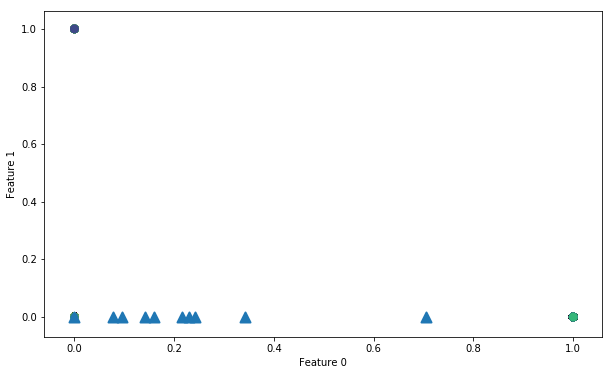

In [129]:


X = profile_data.iloc[:,1:].values
fig = plt.figure(figsize=(10, 6))
y_pred, kmeans = gen_cluster(cluster_num=10, X=X)
# 画出簇分配和簇中心
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

array([4, 4, 6, ..., 6, 8, 4])

In [131]:
profile_data['p_cls']=y_pred

,pid,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p57,p58,p59,p60,p61,p62,p63,p64,p65,p_cls
0,196356.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,204083.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4
2,170667.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
3,115511.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
4,129719.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9


In [134]:
profile_data[['pid','p_cls']].p_cls.value_counts()

3    7333
4    6932
9    6826
7    6646
2    6580
6    6404
1    6134
0    5668
5    5359
8    5209
Name: p_cls, dtype: int64

In [142]:
data.head()

,click_mode,d,o,pid,plan_time,plans,req_time,sid,times
0,9.0,"116.32,39.96","116.29,39.97",-1,2018-11-02 17:54:30,"[{""distance"": 5219, ""price"": 300, ""eta"": 1367,...",2018-11-02 17:54:30,3000821,191282
1,1.0,"116.33,39.79","116.39,39.84",210736,2018-11-16 10:53:10,"[{""distance"": 13864, ""price"": 600, ""eta"": 3221...",2018-11-16 10:53:10,3085857,1
2,9.0,"116.27,40.00","116.31,39.93",-1,2018-10-06 10:33:58,"[{""distance"": 12294, ""price"": 400, ""eta"": 2472...",2018-10-06 10:33:58,2944522,191282
3,1.0,"116.39,39.90","116.27,39.88",202427,2018-11-23 14:54:11,"[{""distance"": 14853, ""price"": 1700, ""eta"": 291...",2018-11-23 14:54:11,559931,2709
4,7.0,"116.37,39.86","116.34,39.96",172251,2018-10-30 11:48:41,"[{""distance"": 12882, ""price"": 600, ""eta"": 3211...",2018-10-30 11:48:41,2819352,15


In [146]:
data.loc[data['click_mode']==-1,'plan_time'].max()

Timestamp('2018-12-07 23:59:31')

In [149]:
data['week']=data['plan_time'].apply(lambda x:x.week)

In [147]:
d=pd.to_datetime('2019-05-17')

In [150]:
data.head()

,click_mode,d,o,pid,plan_time,plans,req_time,sid,times,week
0,9.0,"116.32,39.96","116.29,39.97",-1,2018-11-02 17:54:30,"[{""distance"": 5219, ""price"": 300, ""eta"": 1367,...",2018-11-02 17:54:30,3000821,191282,44
1,1.0,"116.33,39.79","116.39,39.84",210736,2018-11-16 10:53:10,"[{""distance"": 13864, ""price"": 600, ""eta"": 3221...",2018-11-16 10:53:10,3085857,1,46
2,9.0,"116.27,40.00","116.31,39.93",-1,2018-10-06 10:33:58,"[{""distance"": 12294, ""price"": 400, ""eta"": 2472...",2018-10-06 10:33:58,2944522,191282,40
3,1.0,"116.39,39.90","116.27,39.88",202427,2018-11-23 14:54:11,"[{""distance"": 14853, ""price"": 1700, ""eta"": 291...",2018-11-23 14:54:11,559931,2709,47
4,7.0,"116.37,39.86","116.34,39.96",172251,2018-10-30 11:48:41,"[{""distance"": 12882, ""price"": 600, ""eta"": 3211...",2018-10-30 11:48:41,2819352,15,44


In [153]:
data1=data.sort_values(by='plan_time')

In [161]:
#data1['last_mode']=data1.groupby('pid')['click_mode'].transform(lambda x:x.shift(1))
data1['pre_mode']=data1.groupby('pid')['click_mode'].transform(lambda x:x.shift(1).rolling(3).median())

In [162]:
data1[data1['pid']==101467]

,click_mode,d,o,pid,plan_time,plans,req_time,sid,times,week,last_mode,pre_mode
13587,5.0,"116.34,39.90","116.34,39.90",101467,2018-10-01 00:00:10,"[{""distance"": 923, ""price"": """", ""eta"": 859, ""t...",2018-10-01 00:00:10,753082,396,40,NaN,NaN
208528,1.0,"116.39,39.91","116.39,39.87",101467,2018-10-01 01:46:06,"[{""distance"": 6134, ""price"": 200, ""eta"": 2932,...",2018-10-01 01:46:06,722886,396,40,5.0,NaN
365810,1.0,"116.39,39.91","116.37,39.86",101467,2018-10-01 02:25:19,"[{""distance"": 7200, ""price"": 200, ""eta"": 3129,...",2018-10-01 02:25:19,785617,396,40,1.0,NaN
65684,3.0,"116.39,39.91","116.37,39.89",101467,2018-10-01 02:37:46,"[{""distance"": 4759, ""price"": 200, ""eta"": 2743,...",2018-10-01 02:37:46,785618,396,40,1.0,1.0
460738,1.0,"116.39,39.78","116.34,39.90",101467,2018-10-01 07:58:52,"[{""distance"": 17332, ""price"": 2200, ""eta"": 513...",2018-10-01 07:58:52,753079,396,40,3.0,1.0
258005,9.0,"116.40,39.91","116.39,39.98",101467,2018-10-01 09:30:52,"[{""distance"": 10505, ""price"": 400, ""eta"": 2344...",2018-10-01 09:30:52,785168,396,40,1.0,1.0
171908,2.0,"116.40,39.93","116.39,39.98",101467,2018-10-01 09:37:18,"[{""distance"": 5861, ""price"": 300, ""eta"": 1142,...",2018-10-01 09:37:18,785167,396,40,9.0,3.0
58937,2.0,"116.40,39.93","116.39,39.98",101467,2018-10-01 09:40:28,"[{""distance"": 6003, ""price"": 300, ""eta"": 1264,...",2018-10-01 09:40:28,785169,396,40,2.0,2.0
487870,11.0,"116.41,39.64","116.54,39.76",101467,2018-10-01 10:09:11,"[{""distance"": 31012, ""price"": 900, ""eta"": 6161...",2018-10-01 10:09:11,720532,396,40,2.0,2.0
263410,1.0,"116.32,40.05","116.19,39.93",101467,2018-10-01 10:10:49,"[{""distance"": 29411, ""price"": 700, ""eta"": 7749...",2018-10-01 10:10:49,729778,396,40,11.0,2.0


In [164]:
data1[data1['click_mode']==-1]

,click_mode,d,o,pid,plan_time,plans,req_time,sid,times,week,last_mode,pre_mode
545016,-1.0,"116.68,39.93","116.61,39.92",-1,2018-12-01 00:00:10,"[{""distance"": 9044, ""price"": """", ""eta"": 1200, ...",2018-12-01 00:00:10,447255,191282,48,0.0,3.0
519964,-1.0,"116.37,39.86","116.37,39.87",126418,2018-12-01 00:00:25,"[{""distance"": 144, ""price"": """", ""eta"": 122, ""t...",2018-12-01 00:00:25,468412,71,48,2.0,2.0
574436,-1.0,"116.27,39.91","116.31,39.94",109311,2018-12-01 00:00:30,"[{""distance"": 11448, ""price"": """", ""eta"": 1031,...",2018-12-01 00:00:30,421621,1647,48,6.0,1.0
512728,-1.0,"116.40,39.95","116.42,39.95",-1,2018-12-01 00:00:35,"[{""distance"": 2119, ""price"": 200, ""eta"": 1509,...",2018-12-01 00:00:35,446843,191282,48,-1.0,0.0
565167,-1.0,"116.45,39.97","116.55,39.76",-1,2018-12-01 00:00:40,"[{""distance"": 34753, ""price"": """", ""eta"": 2537,...",2018-12-01 00:00:40,468884,191282,48,-1.0,-1.0
544948,-1.0,"116.39,39.90","116.40,39.92",193205,2018-12-01 00:01:10,"[{""distance"": 3991, ""price"": 200, ""eta"": 1991,...",2018-12-01 00:01:10,436679,526,48,9.0,2.0
506328,-1.0,"116.27,40.00","116.39,39.89",-1,2018-12-01 00:01:24,"[{""distance"": 21106, ""price"": 500, ""eta"": 6327...",2018-12-01 00:01:24,463199,191282,48,-1.0,-1.0
564277,-1.0,"116.33,40.01","116.35,39.99",-1,2018-12-01 00:01:37,"[{""distance"": 4813, ""price"": 1700, ""eta"": 786,...",2018-12-01 00:01:37,435537,191282,48,-1.0,-1.0
502609,-1.0,"116.58,39.98","116.44,39.69",-1,2018-12-01 00:01:47,"[{""distance"": 45361, ""price"": """", ""eta"": 2663,...",2018-12-01 00:01:47,420801,191282,48,-1.0,-1.0
573912,-1.0,"117.27,40.65","116.20,39.92",-1,2018-12-01 00:02:11,"[{""distance"": 155770, ""price"": 48700, ""eta"": 7...",2018-12-01 00:02:11,428669,191282,48,-1.0,-1.0


In [ ]:
data1[['sid','last_mode','pre_mode']]

In [165]:
features_all_df=pd.merge(features_all_df,data1[['sid','last_mode','pre_mode']],on=['sid'],how='left')

In [166]:
len(features_all_df)

583625

In [177]:
plan_df = pd.read_csv('../data/data_set_phase1/plans_djsd.csv')

In [183]:
cut_plan_df = plan_df[['sid', 'plan_pos', 'distance', 'eta', 'price', 'transport_mode', 'dj', 'sd', 'sd_dj']]
# 去挑一个sid 对应两个相同的mode 的plan 2596417
cut_plan_df = cut_plan_df.drop_duplicates(subset=['sid', 'transport_mode'])
# 虽然推荐了，用户没有点击的（click_mode =0） 的记录没有关联上   sid:37718  pid: 11772
merge_df = pd.merge(data1, cut_plan_df, left_on=['sid', 'click_mode'], right_on=['sid', 'transport_mode'], how='left')
# 填充-1就错了
# merge_df.loc[merge_df['plan_pos'].isnull(), ['plan_pos', 'distance', 'eta', 'price', 'dj', 'sd', 'sd_dj']] = -1
merge_df.loc[merge_df['transport_mode'].isnull(), 'transport_mode'] = 0

In [187]:
merge_df = merge_df.sort_values(by='plan_time')

In [219]:
merge_df.loc[merge_df['pid']==101467,['click_mode','week']+list(merge_df.columns[10:])].head(10)

,click_mode,week,distance,eta,price,transport_mode,dj,sd,sd_dj,pid_max_dist,...,pid_std_dj,pid_max_sd,pid_min_sd,pid_mean_sd,pid_std_sd,pid_max_sd_dj,pid_min_sd_dj,pid_mean_sd_dj,pid_std_sd_dj,pid_max_mode
0,5.0,40,923.0,859.0,0.0,5.0,0.000000,1.074505,2000.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
182,1.0,40,6134.0,2932.0,200.0,1.0,0.032605,2.092087,64.164318,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
214,1.0,40,7200.0,3129.0,200.0,1.0,0.027778,2.301055,82.837967,6134.0,...,0.023055,2.092087,1.074505,1.583296,0.719539,2000.0,64.164318,1032.082159,1368.842538,2.0
218,3.0,40,4561.0,1171.0,0.0,3.0,0.000000,3.894962,2000.000000,7200.0,...,0.017597,2.301055,1.074505,1.822549,0.656197,2000.0,64.164318,715.667428,1112.303822,2.0
1748,1.0,40,17332.0,5138.0,2200.0,1.0,0.126933,3.373297,26.575447,7200.0,...,0.017542,3.894962,1.074505,2.340652,1.166527,2000.0,64.164318,1036.750571,1112.290759,2.0
3233,9.0,40,10505.0,2344.0,400.0,9.0,0.038077,4.481655,117.699472,17332.0,...,0.052271,3.894962,1.074505,2.547181,1.110793,2000.0,26.575447,834.715546,1063.947276,2.0
3350,2.0,40,5861.0,1142.0,300.0,2.0,0.051186,5.132224,100.266553,17332.0,...,0.046754,4.481655,1.074505,2.869594,1.269168,2000.0,26.575447,715.212867,995.626630,2.0
3399,2.0,40,6003.0,1264.0,300.0,2.0,0.049975,4.749209,95.031669,17332.0,...,0.042989,5.132224,1.074505,3.192826,1.440027,2000.0,26.575447,627.363394,938.127407,2.0
3895,11.0,40,31012.0,6161.0,900.0,11.0,0.029021,5.033598,173.446617,17332.0,...,0.039972,5.132224,1.074505,3.387374,1.442300,2000.0,26.575447,560.821928,888.695121,2.0
3919,1.0,40,29411.0,7749.0,700.0,1.0,0.023801,3.795457,159.468857,31012.0,...,0.037597,5.132224,1.074505,3.570288,1.456475,2000.0,26.575447,517.780227,841.266862,2.0


In [216]:
def get_max_fre(x):
    c=x.value_counts()
    if len(c)==0:
        return np.nan
    else:
        return c.idxmax()
merge_df['pid_max_mode']=merge_df.groupby('pid')['click_mode'].transform(lambda x: get_max_fre(x.shift(1)))

In [221]:
def mode_num(c):
    """
    :param c:
    :return:
    """
    z = np.zeros(12)
    k = c.index.values.astype(np.int32)
    v = c.values
    idx = np.where(k > -1)
    kc = k[idx]
    vc = v[idx]
    z[kc] = vc
    return z / np.sum(z)

mode_num_names = ['mode_num_{}'.format(i) for i in range(12)]
pid_group_df = merge_df.groupby('pid')['click_mode'].apply(lambda x: mode_num(x.shift(1).value_counts())).reset_index()
mode_columns = ['pid'] + mode_num_names
mode_data = np.concatenate(pid_group_df['click_mode'].values, axis=0).reshape(len(pid_group_df), 12)
sid_data = pid_group_df['pid'].values.reshape(len(pid_group_df), 1)
mode_num_df = pd.DataFrame(np.hstack([sid_data, mode_data]), columns=mode_columns)
mode_num_df.columns = mode_columns





d:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [232]:
features_all_df=pd.merge(features_all_df,merge_df[['pid','last_mode','pre_mode'] + pid_ext_features],on='sid',how='inner') 
round(features_all_df, 7).to_csv('../data/features/features_all_ts.csv', index=False)

In [107]:
merge_df.loc[merge_df['pid']==101467]

,sid,pid,plan_time,click_mode,last_mode,pre_mode,pid_max_dist,pid_min_dist,pid_mean_dist,pid_std_dist,...,pid_max_sd,pid_min_sd,pid_mean_sd,pid_std_sd,pid_max_sd_dj,pid_min_sd_dj,pid_mean_sd_dj,pid_std_sd_dj,shift_cm,pid_max_mode
0,753082,101467,2018-10-01 00:00:10,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
182,722886,101467,2018-10-01 01:46:06,1.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",5.0
214,785617,101467,2018-10-01 02:25:19,1.0,1.0,NaN,6134.0,923.0,3528.500000,3684.733437,...,2.092087,1.074505,1.583296,0.719539,2000.000000,64.164318,1032.082159,1368.842538,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0
218,785618,101467,2018-10-01 02:37:46,3.0,1.0,1.0,7200.0,923.0,4752.333333,3358.859082,...,2.301055,1.074505,1.822549,0.656197,2000.000000,64.164318,715.667428,1112.303822,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0
1748,753079,101467,2018-10-01 07:58:52,1.0,3.0,1.0,7200.0,923.0,4704.500000,2744.165022,...,3.894962,1.074505,2.340652,1.166527,2000.000000,64.164318,1036.750571,1112.290759,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0
3233,785168,101467,2018-10-01 09:30:52,9.0,1.0,1.0,17332.0,923.0,7230.000000,6126.873795,...,3.894962,1.074505,2.547181,1.110793,2000.000000,26.575447,834.715546,1063.947276,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0
3350,785167,101467,2018-10-01 09:37:18,2.0,9.0,3.0,17332.0,923.0,7775.833333,5640.786307,...,4.481655,1.074505,2.869594,1.269168,2000.000000,26.575447,715.212867,995.626630,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0
3399,785169,101467,2018-10-01 09:40:28,2.0,2.0,2.0,17332.0,923.0,7502.285714,5199.922106,...,5.132224,1.074505,3.192826,1.440027,2000.000000,26.575447,627.363394,938.127407,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0
3895,720532,101467,2018-10-01 10:09:11,11.0,2.0,2.0,17332.0,923.0,7314.875000,4843.287179,...,5.132224,1.074505,3.387374,1.442300,2000.000000,26.575447,560.821928,888.695121,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0
3919,729778,101467,2018-10-01 10:10:49,1.0,11.0,2.0,31012.0,923.0,9947.888889,9106.048051,...,5.132224,1.074505,3.570288,1.456475,2000.000000,26.575447,517.780227,841.266862,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1.0


In [104]:
merge_df['pid_max_mode'] = merge_df['shift_cm'].apply(get_max_fre)

In [227]:
merge_df[['sid', 'pid','last_mode','pre_mode'] + pid_ext_features].to_csv('../data/data_set_phase1/pid_ext_ts_feature.csv', index=False)

In [263]:
merge_df.columns

Index(['click_mode', 'pid', 'plan_time', 'req_time', 'sid', 'times', 'week',
       'last_mode', 'pre_mode', 'plan_pos', 'distance', 'eta', 'price',
       'transport_mode', 'dj', 'sd', 'sd_dj', 'pid_max_dist', 'pid_min_dist',
       'pid_mean_dist', 'pid_std_dist', 'pid_max_price', 'pid_min_price',
       'pid_mean_price', 'pid_std_price', 'pid_max_eta', 'pid_min_eta',
       'pid_mean_eta', 'pid_std_eta', 'pid_max_dj', 'pid_min_dj',
       'pid_mean_dj', 'pid_std_dj', 'pid_max_sd', 'pid_min_sd', 'pid_mean_sd',
       'pid_std_sd', 'pid_max_sd_dj', 'pid_min_sd_dj', 'pid_mean_sd_dj',
       'pid_std_sd_dj', 'pid_max_mode', 'shift_cm'],
      dtype='object')

In [45]:
def gen_pre_list(x):
    le = x.size  
    pre_list =list(map(list, zip(*[x.shift(i).values for i in range(1, 1 + le)][::-1])))
    ls = {'shift_cm': pd.Series(pre_list)}
    df = pd.DataFrame(ls, columns=['shift_cm'])
    df.index=x.index
    return df


In [52]:

merge_df.loc[merge_df['pid'] != -1, 'shift_cm'] = merge_df.loc[merge_df['pid'] != -1].groupby('pid')['click_mode'].apply(gen_pre_list)

In [94]:
merge_df['pid_max_mode'] = merge_df.groupby('pid')['shift_cm'].transform(lambda x:get_max_fre(x))

In [5]:
import os
os.chdir('d:/git/forecast_template/forecast/recommend/rec')
merge_df =pd.read_csv('../data/data_set_phase1/pid_ext_ts_feature.csv')

In [75]:
def get_max_fre(x):
    if x is np.nan:
        return np.nan
    if -1 in x:
        x = x[0:x.index[-1]]
    c = pd.value_counts(x)
    if len(c) == 0:
        return np.nan
    else:
        return c.idxmax()

In [76]:
merge_df['pid_max_mode'] = merge_df.groupby('pid')['shift_cm'].transform(get_max_fre)

In [77]:
merge_df.head()

,sid,pid,plan_time,click_mode,last_mode,pre_mode,pid_max_dist,pid_min_dist,pid_mean_dist,pid_std_dist,...,pid_max_sd,pid_min_sd,pid_mean_sd,pid_std_sd,pid_max_sd_dj,pid_min_sd_dj,pid_mean_sd_dj,pid_std_sd_dj,shift_cm,pid_max_mode
0,753082,101467,2018-10-01 00:00:10,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
1,756507,171074,2018-10-01 00:00:11,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
2,776916,142228,2018-10-01 00:00:46,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
3,762813,106323,2018-10-01 00:00:47,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN
4,767905,108389,2018-10-01 00:00:50,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[nan],NaN


In [117]:
merge_df.loc[merge_df['click_mode']==-1,['click_mode','shift_cm','pid_max_mode']].iloc[100:120]


,click_mode,shift_cm,pid_max_mode
491154,-1.0,"[nan, 1.0, 0.0, 1.0]",1.0
491155,-1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2.0
491156,-1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2.0
491157,-1.0,"[nan, 7.0, 7.0]",7.0
491158,-1.0,NaN,NaN
491159,-1.0,"[nan, nan, nan, -1.0, -1.0, -1.0]",NaN
491160,-1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",7.0
491161,-1.0,"[nan, nan, nan, 2.0, 9.0, 6.0, 6.0, 2.0, 4.0]",6.0
491162,-1.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2.0
491163,-1.0,NaN,NaN


In [109]:
def mode_num(x):
    """
    :param c:
    :return:
    """
    if x is np.nan:
        return np.nan
    if -1 in x:
        x = x[0:x.index(-1)]
    c = pd.value_counts(x)
    z = np.zeros(12)
    k = c.index.values.astype(np.int32)
    v = c.values
    z[k] = v
    return z / np.sum(z)

mode_num_names = ['mode_num_{}'.format(i) for i in range(12)]
pid_group_df = merge_df['shift_cm'].apply(lambda x: mode_num(x)).reset_index()
mode_columns = ['pid'] + mode_num_names
mode_data = np.concatenate(pid_group_df['shift_cm'].values, axis=0).reshape(len(pid_group_df), 12)
sid_data = pid_group_df['pid'].values.reshape(len(pid_group_df), 1)
mode_num_df = pd.DataFrame(np.hstack([sid_data, mode_data]), columns=mode_columns)
mode_num_df.columns = mode_columns


ValueError: all the input arrays must have same number of dimensions

In [120]:
pid_group_df.iloc[100:200][['shift_cm']].values[0:10]

array([array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       nan,
       array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
       nan], dtype=object)

In [135]:
merge_df.iloc[100:200][['sid','pid','shift_cm','click_mode']].values[0:10]

array([[754165, 113418,
        list([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        9.0],
       [770164, 126871,
        list([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        1.0],
       [755194, 106326, list([nan]), 10.0],
       [748881, 182506,
        l

In [125]:
mode_num([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
        9.0])

IndentationError: unexpected indent (<ipython-input-125-752206605b51>, line 2)

In [126]:
len([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
          nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

NameError: name 'nan' is not defined

In [144]:
mode_num(merge_df[merge_df['sid']==770873].iloc[0].shift_cm)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [147]:
mode_num([np.nan])

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [148]:
c = pd.value_counts([np.nan])

In [149]:
    def mode_num(x):
        """
        :param c:
        :return:
        """
        if x is np.nan:
            return [np.nan]*12
        if -1 in x:
            x = x[0:x.index(-1)]
        c = pd.value_counts(x)
        z = np.zeros(12)
        k = c.index.values.astype(np.int32)
        v = c.values
        z[k] = v
        return z / np.sum(z)

Series([], dtype: int64)

In [150]:
x=[np.nan]

In [151]:
c = pd.value_counts(x)

In [152]:
c

Series([], dtype: int64)

In [155]:
k = c.index.values.astype(np.int32)

In [157]:
z[k] = v

In [158]:
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [159]:
z / np.sum(z)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [160]:
np.sum(z)

0.0

In [167]:
def mode_num(x):
    """
    :param c:
    :return:
    """
    if x is np.nan:
        return [0] * 12
    if -1 in x:
        x = x[0:x.index(-1)]
    c = pd.value_counts(x)
    z = np.zeros(12)
    if len(c) > 0:
        k = c.index.values.astype(np.int32)
        v = c.values
        z[k] = v
        z = z / np.sum(z)
    return z

In [166]:
mode_num([np.nan])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [169]:
pid_group_df = merge_df['shift_cm'].apply(lambda x: mode_num(x)).reset_index()
mode_columns = ['sid'] + mode_num_names
mode_data = np.concatenate(pid_group_df['shift_cm'].values, axis=0).reshape(len(pid_group_df), 12)
sid_data = merge_df['sid'].values.reshape(len(pid_group_df), 1)
mode_num_df = pd.DataFrame(np.hstack([sid_data, mode_data]), columns=mode_columns)
mode_num_df.columns = mode_columns

KeyError: 'pid'

In [178]:
mode_num_df = pd.DataFrame(np.hstack([sid_data, mode_data]), columns=mode_columns)
mode_num_df.columns = mode_columns

In [179]:
mode_num_df.head()

,sid,mode_num_0,mode_num_1,mode_num_2,mode_num_3,mode_num_4,mode_num_5,mode_num_6,mode_num_7,mode_num_8,mode_num_9,mode_num_10,mode_num_11
0,753082.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,756507.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,776916.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,762813.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,767905.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
sid_data.shape

(583625, 1)

In [181]:
merge_df = pd.merge(merge_df, mode_num_df, on=['sid'], how='left')

In [183]:
merge_df.columns

Index(['sid', 'pid', 'plan_time', 'click_mode', 'last_mode', 'pre_mode',
       'pid_max_dist', 'pid_min_dist', 'pid_mean_dist', 'pid_std_dist',
       'pid_max_price', 'pid_min_price', 'pid_mean_price', 'pid_std_price',
       'pid_max_eta', 'pid_min_eta', 'pid_mean_eta', 'pid_std_eta',
       'pid_max_dj', 'pid_min_dj', 'pid_mean_dj', 'pid_std_dj', 'pid_max_sd',
       'pid_min_sd', 'pid_mean_sd', 'pid_std_sd', 'pid_max_sd_dj',
       'pid_min_sd_dj', 'pid_mean_sd_dj', 'pid_std_sd_dj', 'shift_cm',
       'pid_max_mode', 'mode_num_0', 'mode_num_1', 'mode_num_2', 'mode_num_3',
       'mode_num_4', 'mode_num_5', 'mode_num_6', 'mode_num_7', 'mode_num_8',
       'mode_num_9', 'mode_num_10', 'mode_num_11'],
      dtype='object')

In [184]:
merge_df.to_csv('../data/data_set_phase1/pid_ext_ts_feature.csv', index=False)

In [185]:
len(merge_df)

583625

In [187]:
ext_columns=['sid','pid_max_mode', 'mode_num_0', 'mode_num_1', 'mode_num_2', 'mode_num_3',
       'mode_num_4', 'mode_num_5', 'mode_num_6', 'mode_num_7', 'mode_num_8',
       'mode_num_9', 'mode_num_10', 'mode_num_11'

In [195]:
features_all_df=pd.merge(data,merge_df[ext_columns],on='sid',how='inner') 


In [198]:
features_all_df.to_csv('../data/features/features_all_ts.csv',index=False)

In [194]:
data.columns.values

array(['click_mode', 'd', 'o', 'pid', 'plan_time', 'sid', 'is_rain',
       'is_rain_max_mode', 'mode_feas_0', 'mode_feas_1', 'mode_feas_2',
       'mode_feas_3', 'mode_feas_4', 'mode_feas_5', 'mode_feas_6',
       'mode_feas_7', 'mode_feas_8', 'mode_feas_9', 'mode_feas_10',
       'mode_feas_11', 'first_mode', 'max_dist', 'min_dist', 'mean_dist',
       'std_dist', 'max_price', 'min_price', 'mean_price', 'std_price',
       'max_eta', 'min_eta', 'mean_eta', 'std_eta', 'max_dj', 'min_dj',
       'mean_dj', 'std_dj', 'max_sd', 'min_sd', 'mean_sd', 'std_sd',
       'max_sd_dj', 'min_sd_dj', 'mean_sd_dj', 'std_sd_dj',
       'max_dist_mode', 'min_dist_mode', 'max_price_mode',
       'min_price_mode', 'max_eta_mode', 'min_eta_mode', 'svd_mode_0',
       'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8',
       'svd_mode_9', 'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3',
       'svd_fea_4', 'svd_fea_5', 'svd_fea_6', 's

In [197]:
features_all_df.columns.values

array(['click_mode', 'd', 'o', 'pid', 'plan_time', 'sid', 'is_rain',
       'is_rain_max_mode', 'mode_feas_0', 'mode_feas_1', 'mode_feas_2',
       'mode_feas_3', 'mode_feas_4', 'mode_feas_5', 'mode_feas_6',
       'mode_feas_7', 'mode_feas_8', 'mode_feas_9', 'mode_feas_10',
       'mode_feas_11', 'first_mode', 'max_dist', 'min_dist', 'mean_dist',
       'std_dist', 'max_price', 'min_price', 'mean_price', 'std_price',
       'max_eta', 'min_eta', 'mean_eta', 'std_eta', 'max_dj', 'min_dj',
       'mean_dj', 'std_dj', 'max_sd', 'min_sd', 'mean_sd', 'std_sd',
       'max_sd_dj', 'min_sd_dj', 'mean_sd_dj', 'std_sd_dj',
       'max_dist_mode', 'min_dist_mode', 'max_price_mode',
       'min_price_mode', 'max_eta_mode', 'min_eta_mode', 'svd_mode_0',
       'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8',
       'svd_mode_9', 'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3',
       'svd_fea_4', 'svd_fea_5', 'svd_fea_6', 's

In [202]:
features_all_df.loc[features_all_df['click_mode']==-1,'pid_max_mode'].value_counts()

2.0     36794
7.0      5385
1.0      4672
9.0      1710
0.0      1543
5.0      1438
3.0      1126
4.0       405
10.0      404
6.0       319
11.0       84
8.0        37
Name: pid_max_mode, dtype: int64

In [203]:
features_all_df.loc[features_all_df['click_mode']!=-1,'pid_max_mode'].value_counts()

2.0     168704
7.0      34194
1.0      29428
9.0      20087
5.0      10433
0.0       7454
3.0       6168
10.0      2702
4.0       2534
6.0       2271
11.0      1154
8.0        210
Name: pid_max_mode, dtype: int64

In [281]:
globals = {
    'nan': np.nan   
}